# Investment Strategy for Teclov



## *Problem 2:* Determining the Investment Type
***

### Summary based on the data analysis
***
<span style='color:Green'>
    <span style='font-family:Georgia'>
<b> $"Venture"$ is the preferred investment type for Teclov as the average investment in these types is close to 11 million USD. The number of investments in venture is also the highest. This aligns with the strategy that Telcov wants to adapt. The median investment is 5 million USD. See below. </b>
    </span>

## Code

In [38]:
#system specific
import os
import sys
assert sys.version_info >= (3,5)

#import the needed libraries
import numpy as np
import pandas as pd

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

#consistent size plot
from pylab import rcParams
rcParams['figure.figsize']= 12,5
rcParams['xtick.labelsize']= 12
rcParams['ytick.labelsize']= 12
rcParams['axes.labelsize']= 12

#enable viewing of all the columns in a df
pd.options.display.max_columns = None

In [39]:
#load the saved data post cleaning and merging
master_frame = pd.read_csv('merged.csv',delimiter=',',encoding='ISO-8859-2')

In [40]:
#check the info -- > observe the length of the dataset, object types and missing values
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114942 entries, 0 to 114941
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114942 non-null  object 
 1   name                     114942 non-null  object 
 2   homepage_url             108810 non-null  object 
 3   category_list            111535 non-null  object 
 4   status                   114942 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94422 non-null   object 
 10  company_permalink        114942 non-null  object 
 11  funding_round_permalink  114942 non-null  object 
 12  funding_round_type       114942 non-null  object 
 13  funding_round_code       31139 non-null   object 
 14  fund

In [41]:
#check the top rows
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [42]:
#check the columns
master_frame.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [43]:
#check the number of unique companies
len(master_frame['permalink'].unique())

66363

In [44]:
#filter out only those companies which are in operation
master_frame['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [45]:
#store all the row indices of the closed companies
closed_company_index = master_frame[master_frame['status']=='closed'].index

In [46]:
#number of closed companies
len(closed_company_index)

8720

In [47]:
#drop the rows 
master_frame.drop(closed_company_index,axis=0,inplace=True)

In [48]:
master_frame.shape

(106222, 16)

In [49]:
#explore the funding_round_type
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

Telcov would like to invest in one of the 4 investment types - seed, angel, venture and private_equity. We need to find out the most representative investment across these levels of startups/companies. There are other investment/funding types also highlighted. 

In [50]:
#group the data based on the investment types
master_frame['funding_round_type'].value_counts().sort_values(ascending=False)

venture                  51462
seed                     27901
debt_financing            6460
angel                     5376
undisclosed               4597
equity_crowdfunding       3180
private_equity            2103
grant                     2039
convertible_note          1725
post_ipo_equity            579
product_crowdfunding       390
non_equity_assistance      182
post_ipo_debt              139
secondary_market            89
Name: funding_round_type, dtype: int64

<b> Drop all the rows where the fund type is not in (seed,angel,venture,private_equity) </b>

In [51]:
#create the list of fund_round_type that is to be dropped
non_fund_list = ['undisclosed', 'equity_crowdfunding','convertible_note','debt_financing','grant',
             'secondary_market', 'post_ipo_equity', 'post_ipo_debt','product_crowdfunding', 'non_equity_assistance']

#retrieve the indices
non_fund_type_index = master_frame[master_frame['funding_round_type'].isin(non_fund_list)].index

In [52]:
#print these indices
non_fund_type_index

Int64Index([     6,     14,     17,     18,     19,     20,     23,     24,
                25,     26,
            ...
            114841, 114849, 114850, 114857, 114858, 114889, 114914, 114931,
            114937, 114941],
           dtype='int64', length=19380)

In [53]:
#drop these rows from master_frame
master_frame.drop(non_fund_type_index,axis=0,inplace=True)

In [54]:
#check shape
master_frame.shape

(86842, 16)

In [55]:
#check the funding type after dropping the others
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

In [56]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86842 entries, 0 to 114940
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                86842 non-null  object 
 1   name                     86842 non-null  object 
 2   homepage_url             83375 non-null  object 
 3   category_list            85217 non-null  object 
 4   status                   86842 non-null  object 
 5   country_code             81114 non-null  object 
 6   state_code               79293 non-null  object 
 7   region                   79977 non-null  object 
 8   city                     79980 non-null  object 
 9   founded_at               72440 non-null  object 
 10  company_permalink        86842 non-null  object 
 11  funding_round_permalink  86842 non-null  object 
 12  funding_round_type       86842 non-null  object 
 13  funding_round_code       28934 non-null  object 
 14  funded_at            

There are no null values in funding_round_type. However there are null values under raised_amount_usd

In [57]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [58]:
#check the distribution of the investment type .. 
master_frame['funding_round_type'].value_counts().sort_values(ascending=False)

venture           51462
seed              27901
angel              5376
private_equity     2103
Name: funding_round_type, dtype: int64

So, there are very high number of venture, followed by seed. angel and private_equity is relatively small.

In [59]:
#view a few rows where raised amount is null
master_frame[master_frame['raised_amount_usd'].isna()].head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
1,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
5,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
33,1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,NaN
42,1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,1000museums-com,/funding-round/adf2f3272af9f552b87e01f10f0b9234,venture,NaN,01-02-2014,NaN
51,1006-tv,1006.tv,http://www.1006.tv/,Games|Media,operating,CHN,22,Beijing,Beijing,01-01-2009,1006-tv,/funding-round/a3631227d5232aa8c2303f252c4f1f87,angel,NaN,01-01-2011,NaN


In [60]:
#impute 0's to all the null values in the column raised_amount_usd
null_usd_index = master_frame[master_frame['raised_amount_usd'].isna()].index

In [61]:
null_usd_index

Int64Index([     1,      5,     33,     42,     51,     53,     54,     63,
                64,     67,
            ...
            114871, 114877, 114888, 114890, 114891, 114892, 114898, 114906,
            114920, 114939],
           dtype='int64', length=12341)

In [62]:
#check the values of the raised_amount at these indices
master_frame.loc[null_usd_index]['raised_amount_usd']

1        NaN
5        NaN
33       NaN
42       NaN
51       NaN
          ..
114892   NaN
114898   NaN
114906   NaN
114920   NaN
114939   NaN
Name: raised_amount_usd, Length: 12341, dtype: float64

We can impute all NaN in raised amount usd to 0 or the median value. But that would expose high risk to Telcov to take sound judgement based on actual data for investing the money. The total investment is a very important leading indicator for Telcov to make an investment type choice. Hence it is better to drop these rows instead of imputing it with 0 or any other value. Moreover, the total rows dropped would still be 12% of the total dataset size. We can come back and change this strategy if it proves to be wrong.

In [63]:
#impute 0 to all the raised amount wherever it is NaN --- > earlier strategy for analysis
#master_frame['raised_amount_usd'].fillna(0,inplace=True)

In [64]:
#drop the rows where raised amount usd is null
master_frame.drop(null_usd_index,axis=0,inplace=True)

In [65]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74501 entries, 0 to 114940
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                74501 non-null  object 
 1   name                     74501 non-null  object 
 2   homepage_url             71505 non-null  object 
 3   category_list            73979 non-null  object 
 4   status                   74501 non-null  object 
 5   country_code             70506 non-null  object 
 6   state_code               69069 non-null  object 
 7   region                   69551 non-null  object 
 8   city                     69554 non-null  object 
 9   founded_at               62826 non-null  object 
 10  company_permalink        74501 non-null  object 
 11  funding_round_permalink  74501 non-null  object 
 12  funding_round_type       74501 non-null  object 
 13  funding_round_code       26171 non-null  object 
 14  funded_at            

There are no more null values in the raised_amount_usd

In [66]:
#uncomment this if imputing a value for raised amount usd

#master_frame.loc[null_usd_index]['raised_amount_usd'] 

In [67]:
master_frame['funding_round_type'].value_counts().sort_values(ascending=False)

venture           46641
seed              21749
angel              4305
private_equity     1806
Name: funding_round_type, dtype: int64

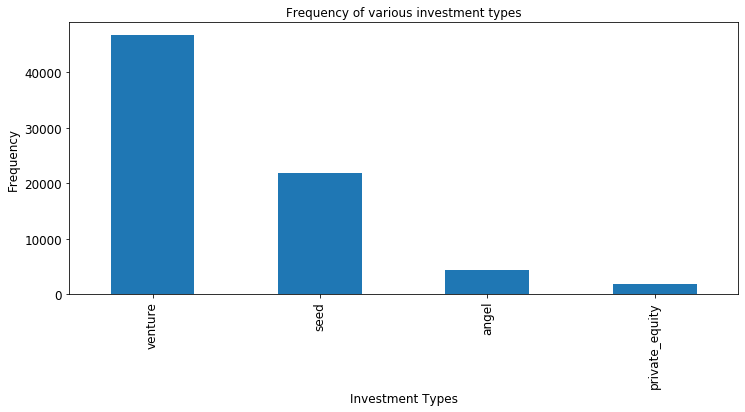

In [68]:
#plot of the investment types
master_frame['funding_round_type'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Frequency of various investment types')
plt.ylabel('Frequency')
plt.xlabel('Investment Types')
plt.show()

Private equity is least and veture is the maximum. 

In [69]:
#average investment across the various fund type
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity    7.557581e+07
venture           1.189560e+07
angel             9.799154e+05
seed              7.385902e+05
Name: raised_amount_usd, dtype: float64

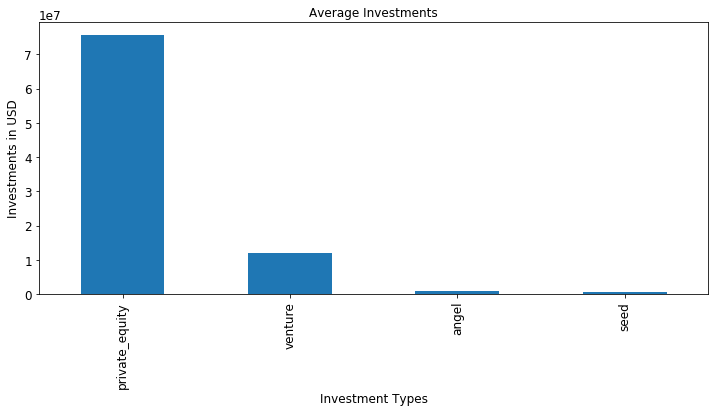

In [70]:
#plot of the average investment across the fund round type
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False).plot(kind='bar')
#plt.yscale('log')
plt.title('Average Investments')
plt.ylabel('Investments in USD')
plt.xlabel('Investment Types')
plt.show()

Clearly, the average private_equity investments are way too high compared to the other three. 

- Private equity average investment is over 70 million USD
- Venture is littl over 11 million USD
- Angel and seed are under 1 million USD

Given the constraint of Teclov to invest 5 million to 15 million USD in one round, private_equity is not the preferred investment type. 

<b> Venture is the preferred investment type for Teclov as the average investment in these types is close to 11 million USD. The number of investments in venture is also the highest. This aligns with the strategy that Telcov wants to adapt. The median investment is 5 million USD. See below. </b>
    
    

In [71]:
#check the median investment
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               400000.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

The median investment in venture is 5 million and average is 11 million USD. 

Before deciding on the investment type, it is necessary to consider only the English speaking countries. This is the second constraint that Telcov has.

#### Drop the rows where the country code is not mentioned
Other columns have no or very little information to ascertain the state code. In order to avoid making large assumptions, lets drop these rows. 


In [72]:
#filter the data so that it contains only the chosen investment type
master_frame = master_frame[master_frame['funding_round_type']=='venture']

In [73]:
master_frame.shape

(46641, 16)

In [74]:
#save the file for further analysis -- > determining the country.
master_frame.to_csv('ventures.csv',index=False)